In [1]:
from multiprocessing.pool import IMapIterator
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
df=pd.read_csv('/content/Nutrient Composition Dataset.csv')
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [3]:
df.shape

(1746, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [5]:
df['Product'].value_counts()

Unknown                                                                        913
Groundcherries, (cape-gooseberries or poha), raw                                 1
Dessert topping, powdered, 1.5 ounce prepared with 1/2 cup milk                  1
Soup, vegetable beef, microwavable, ready-to-serve, single brand                 1
Pork, cured, ham, shank, bone-in, separable lean and fat, unheated               1
                                                                              ... 
Croutons, seasoned                                                               1
Crustaceans, crab, queen, cooked, moist heat                                     1
Crustaceans, spiny lobster, mixed species, cooked, moist heat                    1
Game meat, bison, top round, separable lean only, 1" steak, cooked, broiled      1
Yogurt, plain, whole milk                                                        1
Name: Product, Length: 834, dtype: int64

In [6]:
df=df.drop(['Product','S.No'],axis=1)

In [7]:
df.isnull().sum()

Protein     0
Fat         0
vitaminC    0
Fibre       0
dtype: int64

In [8]:
df.describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


<Axes: ylabel='Protein'>

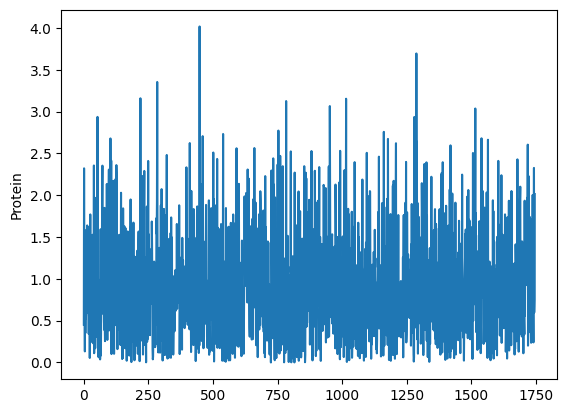

In [9]:
sns.lineplot(df['Protein'])

<Axes: ylabel='Fat'>

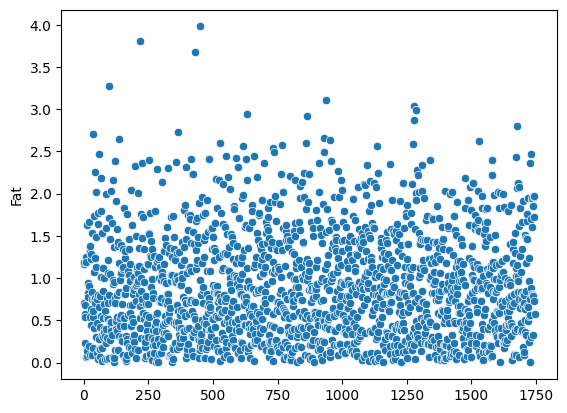

In [10]:
sns.scatterplot(df['Fat'])

<Axes: xlabel='vitaminC', ylabel='Fat'>

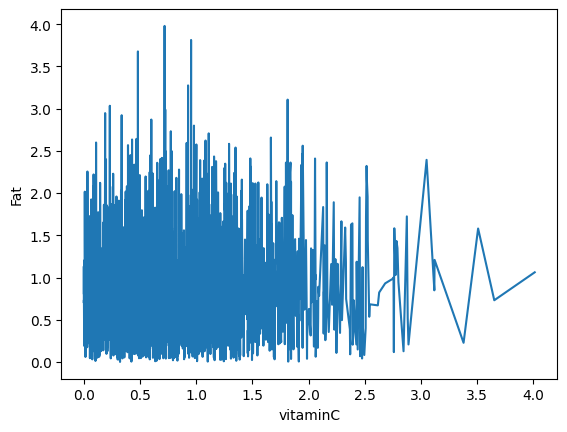

In [11]:
sns.lineplot(x=df['vitaminC'],y=df['Fat'])

<Axes: >

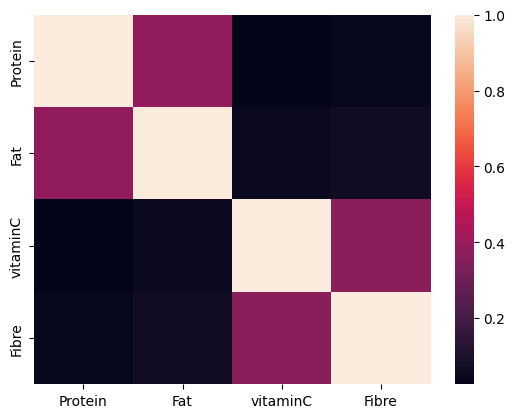

In [12]:
sns.heatmap(df.corr())

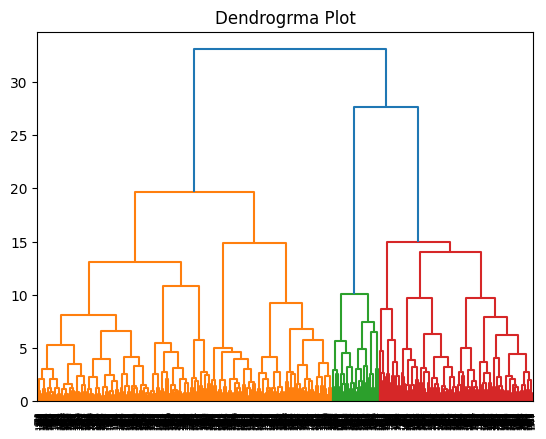

In [13]:
dendro = shc.dendrogram(shc.linkage(df,method="ward"))
plt.title("Dendrogrma Plot")
plt.show()


In [14]:
scaler=StandardScaler()
DF=scaler.fit_transform(df)

In [15]:
methods=['ward','complete','average','single']
for method in methods:
  Z =linkage(DF, method=method)
  clusters= fcluster(Z, t=3,criterion='maxclust')
  silhouette_avg= silhouette_score(DF,clusters)
  print(f'Silhoutte Score for {method} linkage:{silhouette_avg}')


Silhoutte Score for ward linkage:0.20751664009284115
Silhoutte Score for complete linkage:0.18358482947312946
Silhoutte Score for average linkage:0.4800733568418761
Silhoutte Score for single linkage:0.4981063242203874


In [16]:
for num_Clusters in range(2,10):
  Z= linkage(DF,method='single')
  clusters= fcluster(Z, t=num_Clusters,criterion='maxclust')
  silhouette_avg= silhouette_score(DF,clusters)
  print(f'Sihouette_Score for{num_Clusters} clusters:{silhouette_avg}')

Sihouette_Score for2 clusters:0.5019044175673079
Sihouette_Score for3 clusters:0.4981063242203874
Sihouette_Score for4 clusters:0.4902742690626224
Sihouette_Score for5 clusters:0.40656966844998305
Sihouette_Score for6 clusters:0.4019932087993399
Sihouette_Score for7 clusters:0.388739407058724
Sihouette_Score for8 clusters:0.3842361406066378
Sihouette_Score for9 clusters:0.3746383272580705


In [17]:
metrics=['euclidean','cityblock','cosine']
for metric in metrics:
  Z=linkage(DF,method='single',metric=metric)
  clusters=fcluster(Z,t=2,criterion='maxclust')
  silhouette_avg=silhouette_score(DF,clusters)
  print(f'Sihouette_Score for{metric} distance metric:{silhouette_avg}')

Sihouette_Score foreuclidean distance metric:0.5019044175673079
Sihouette_Score forcityblock distance metric:0.5019044175673079
Sihouette_Score forcosine distance metric:-0.10343614406807757


In [18]:
Z1=linkage(DF,method='single',metric='cityblock')
clusters=fcluster(Z1,t=2,criterion='maxclust')
silhouette_avg=silhouette_score(DF,clusters)
print(f'Silhouette Score for single linkage and cityblock distance metric:{silhouette_avg}')


Silhouette Score for single linkage and cityblock distance metric:0.5019044175673079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

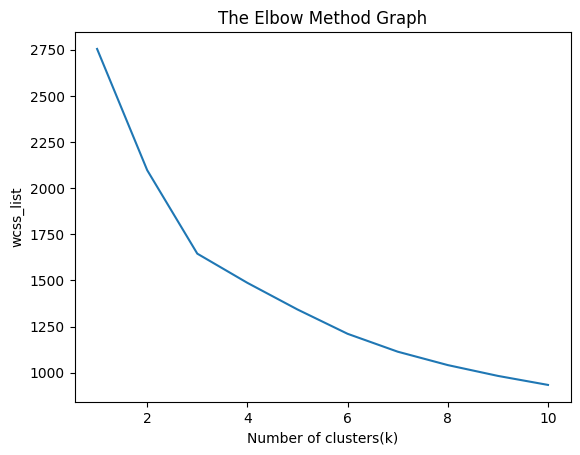

In [19]:
scaler = StandardScaler()
X= scaler.fit_transform(df)



wcss_list=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()


In [20]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
KMeans(n_clusters=3,random_state=42)
cluster_assignments=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


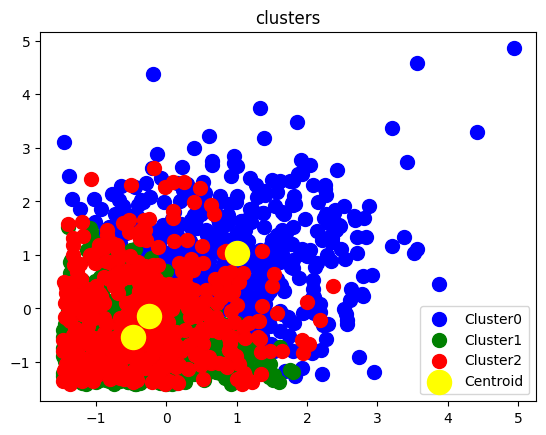

In [21]:
plt.scatter(X[cluster_assignments==0,0], X[cluster_assignments==0,1],s=100,c='blue',label='Cluster0')
plt.scatter(X[cluster_assignments==1,0], X[cluster_assignments==1,1],s=100,c='green',label='Cluster1')
plt.scatter(X[cluster_assignments==2,0], X[cluster_assignments==2,1],s=100,c='red',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('clusters')
plt.legend()

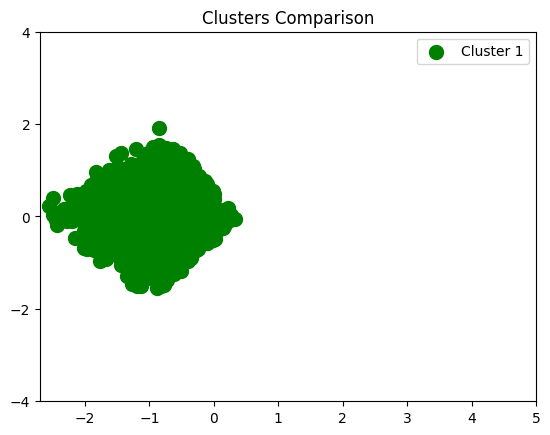

In [22]:
pca = PCA(n_components=2)
reduced_df = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
reduced_df['Cluster'] = cluster_assignments
plt.scatter(reduced_df[reduced_df['Cluster'] == 1]['PC1'], reduced_df[reduced_df['Cluster'] == 1]['PC2'], s=100, c='green', label='Cluster 1')
plt.title('Clusters Comparison')
plt.legend()
plt.xticks([-2,-1, 0,1, 2, 3,4 ,5])
plt.yticks([-4, -2, 0, 2, 4])
plt.show()

In [23]:
cluster_assignments=kmeans.labels_
cluster_assignments



array([2, 0, 2, ..., 1, 0, 0], dtype=int32)

In [24]:
df['cluster']=cluster_assignments
df.head()

,Protein,Fat,vitaminC,Fibre,cluster
0,0.452369,1.170926,1.079271,1.702960,2
1,2.321087,0.706856,0.350088,0.658249,0
2,0.884554,1.186571,2.428544,1.984562,2
3,0.715501,0.577599,0.270925,0.369266,1
4,0.132610,0.544521,0.116884,0.557309,1


In [25]:
x=df.drop('cluster',axis=1)
y=df['cluster']


In [26]:
x=scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
ytestpredl=lr.predict(xtest)
xtrainpredl=lr.predict(xtrain)


In [29]:
acc_lr=accuracy_score(ytest,ytestpredl)
acc_lr

0.9942748091603053

In [30]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [31]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

In [32]:
acc_rfc=accuracy_score(ytest,ytestpredr)
acc_rfc


0.9465648854961832

In [33]:
accuracy_df=pd.DataFrame({'model':['logistic regression','random forest'],
                       'Accuracy':[acc_lr*100,acc_rfc*100]})
print(accuracy_df)

                 model   Accuracy
0  logistic regression  99.427481
1        random forest  94.656489


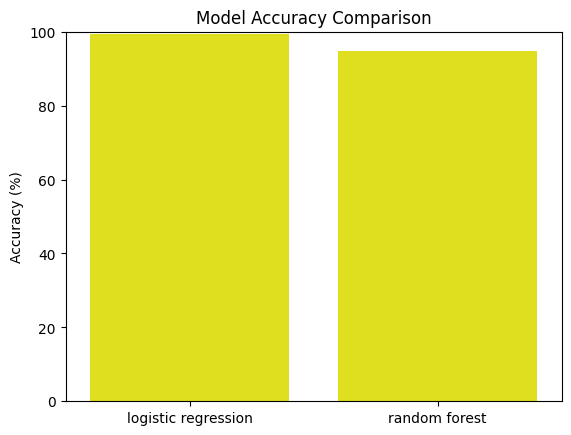

In [34]:
models=['logistic regression','random forest']
accuracy=[acc_lr*100,acc_rfc*100]
sns.barplot(x=models,y=accuracy,color='Yellow')
plt.ylim(0, 100)  # Set the y-axis limit to 0 to 100
plt.ylabel('Accuracy (%)')  # Add y-axis label
plt.title('Model Accuracy Comparison')
plt.show()

In [35]:
pickle.dump(lr,open("lrmodel.pkl","wb"))

In [36]:
print(rfc.predict([[0.452369,1.170926,1.079271,1.702960]]))

[2]
